# Principal Component Analysis with Cancer Data

In [319]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [320]:
bc_df = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [321]:
bc_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [322]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [326]:
bc_df.info()
bc_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


(699, 11)

Observation :- Bare Nuclei is having some missing value and its object type 

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [328]:
bc_df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [331]:
bc_df.isin(['?']).sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [242]:
# We could see "?" values in column, this should be removed from data set
bc_df['Bare Nuclei'].value_counts() 
# Check for missing value in any other column

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [332]:
mode = bc_df['Bare Nuclei'].mode()[0]
print(mode)

1


In [333]:
bc_df['Bare Nuclei'] = bc_df['Bare Nuclei'].replace('?',mode)

In [335]:
bc_df['Bare Nuclei'] = bc_df['Bare Nuclei'].astype('int64')

In [336]:
bc_df['Bare Nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64)

In [337]:
print(bc_df)

          ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0    1000025               5          1           1                  1   
1    1002945               5          4           4                  5   
2    1015425               3          1           1                  1   
3    1016277               6          8           8                  1   
4    1017023               4          1           1                  3   
5    1017122               8         10          10                  8   
6    1018099               1          1           1                  1   
7    1018561               2          1           2                  1   
8    1033078               2          1           1                  1   
9    1033078               4          2           1                  1   
10   1035283               1          1           1                  1   
11   1036172               2          1           1                  1   
12   1041801               5          

In [338]:
# No missing values found. So let us try to remove ? from bare nuclei column
bc_df['Bare Nuclei'].value_counts() 
# Get count of rows having ?


1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [339]:
bc_df.info()
bc_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


(699, 11)

In [368]:
bc_df.duplicated().value_counts()

False    690
True       9
dtype: int64

In [369]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [370]:
# Check for correlation of variable

In [387]:
bc_df =bc_df.drop('ID',axis = 1)


In [389]:
bc_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


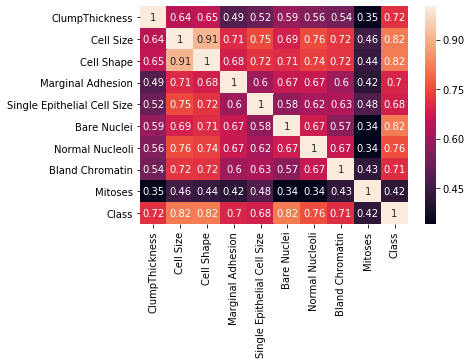

In [390]:
sns.heatmap(bc_df.corr(),annot=True)

In [374]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [375]:
#Let us check for pair plots

D:\anakonda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anakonda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


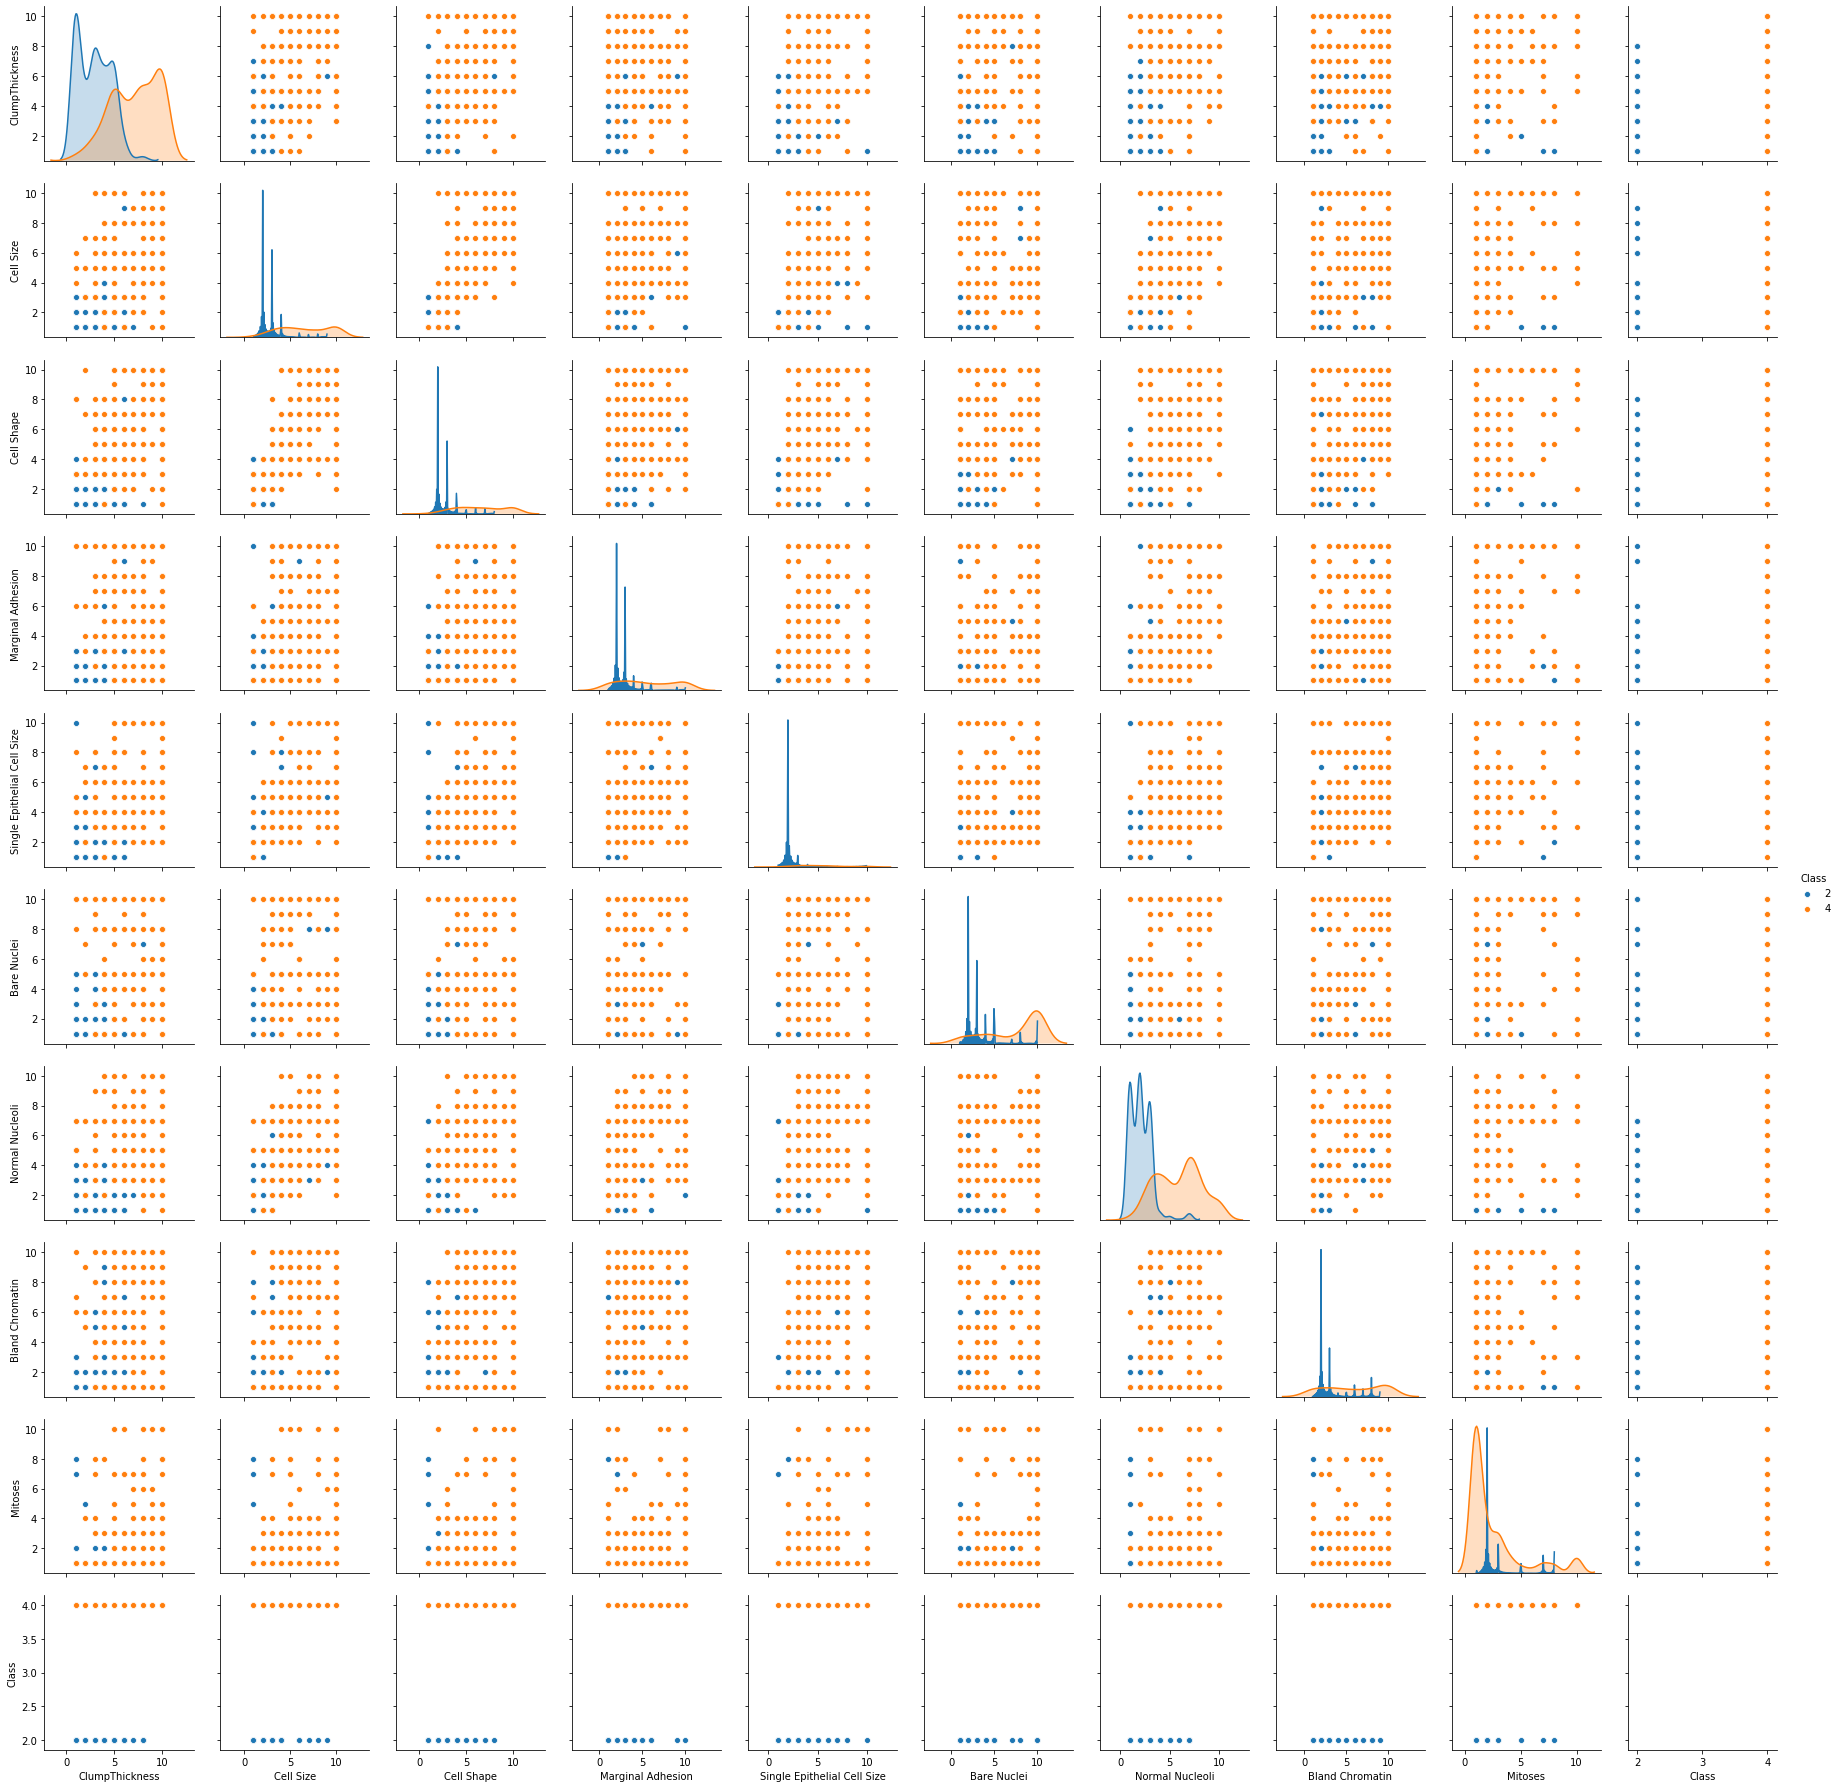

In [391]:
import seaborn as sns
sns.pairplot(bc_df,diag_kind='kde',hue='Class')

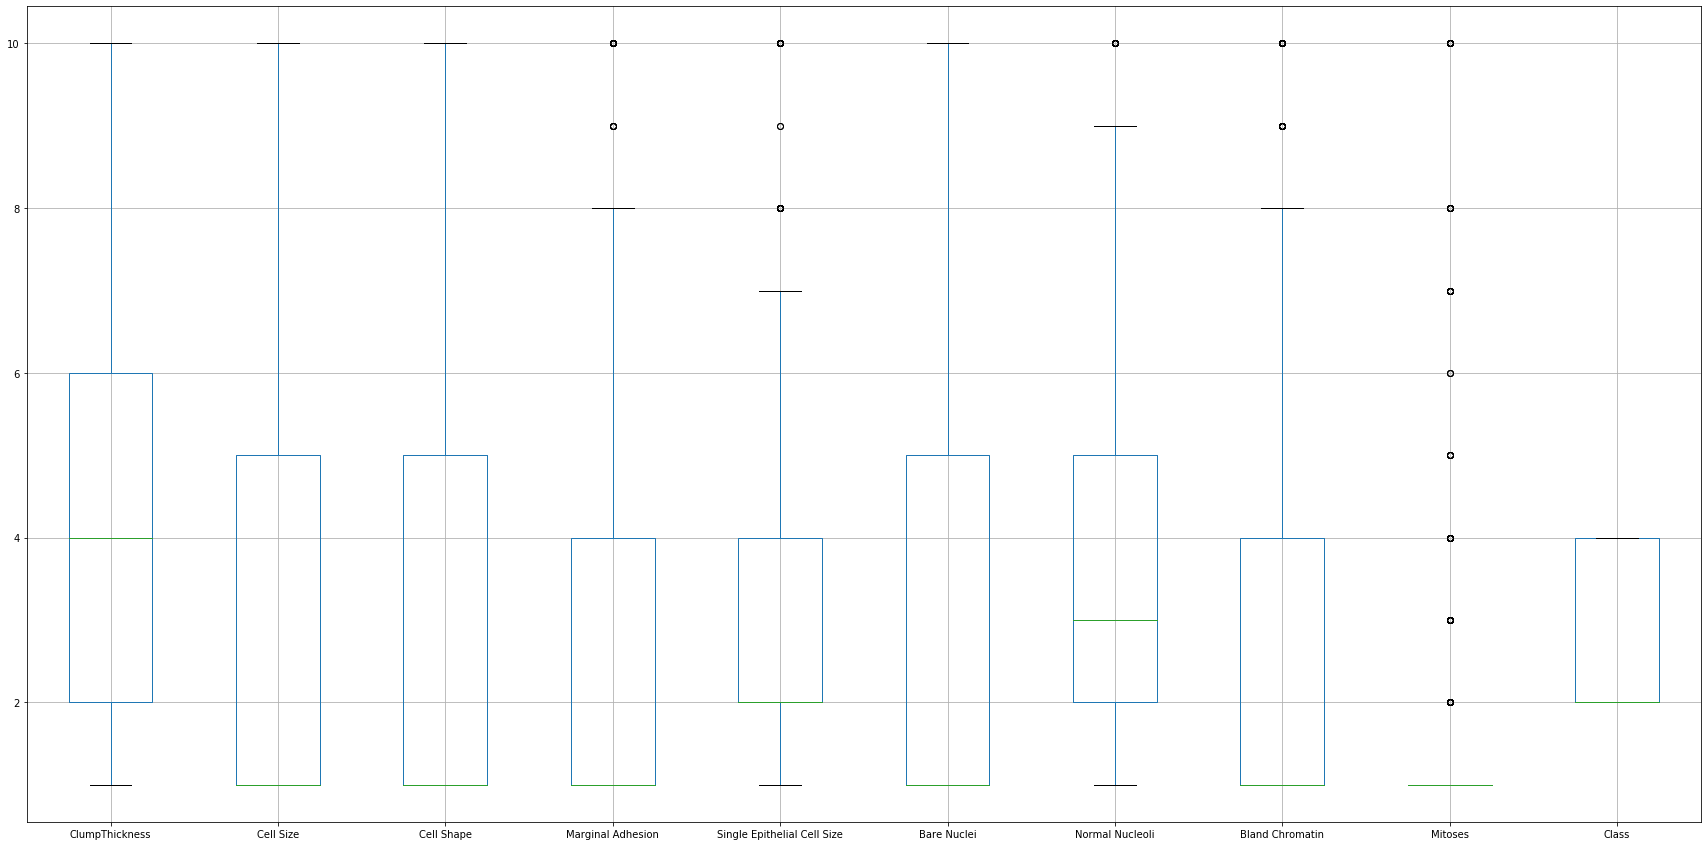

In [392]:
bc_df.boxplot(figsize=(30,15))

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [378]:
# We could see most of the outliers are now removed.

In [393]:
pd.crosstab(bc_df['Mitoses'],bc_df['Class'])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [394]:
pd.crosstab(bc_df['Bland Chromatin'],bc_df['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [395]:
pd.crosstab(bc_df['Normal Nucleoli'],bc_df['Class'])

Class,2,4
Normal Nucleoli,,
1,150,2
2,159,7
3,129,36
4,8,32
5,4,30
6,1,9
7,7,66
8,0,28
9,0,11


In [396]:
pd.crosstab(bc_df['Single Epithelial Cell Size'],bc_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


In [397]:
pd.crosstab(bc_df['Marginal Adhesion'],bc_df['Class'])

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [398]:
#remove outliers for 'Marginal Adhesion'
bc_df.loc[bc_df['Marginal Adhesion'] > 8, 'Marginal Adhesion'] = bc_df['Marginal Adhesion'].quantile(0.75)
print(bc_df['Marginal Adhesion'][bc_df['Marginal Adhesion'] > 8])

#remove outliers for 'Single Epithelial Cell Size'
bc_df.loc[bc_df['Single Epithelial Cell Size'] > 7, 'Single Epithelial Cell Size'] = bc_df['Single Epithelial Cell Size'].quantile(0.75)
print(bc_df['Single Epithelial Cell Size'][bc_df['Single Epithelial Cell Size'] > 7])

#remove outliers for 'Normal Nucleoli'
bc_df.loc[bc_df['Normal Nucleoli'] > 9, 'Normal Nucleoli'] = bc_df['Normal Nucleoli'].quantile(0.75)
print(bc_df['Normal Nucleoli'][bc_df['Normal Nucleoli'] > 9])

#remove outliers for 'Bland Chromatin'
bc_df.loc[bc_df['Bland Chromatin'] > 8, 'Bland Chromatin'] = bc_df['Bland Chromatin'].quantile(0.75)
print(bc_df['Bland Chromatin'][bc_df['Bland Chromatin'] > 8])

#remove outliers for 'Mitoses'
bc1_df.loc[bc1_df['Mitoses'] > 1, 'Mitoses'] = bc1_df['Mitoses'].quantile(0.75)
print(bc1_df['Mitoses'][bc1_df['Mitoses'] > 1])

Series([], Name: Marginal Adhesion, dtype: float64)
Series([], Name: Single Epithelial Cell Size, dtype: float64)
Series([], Name: Normal Nucleoli, dtype: float64)
Series([], Name: Bland Chromatin, dtype: float64)
Series([], Name: Mitoses, dtype: float64)


In [401]:
bc_df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [402]:
bc_df.shape

(699, 10)

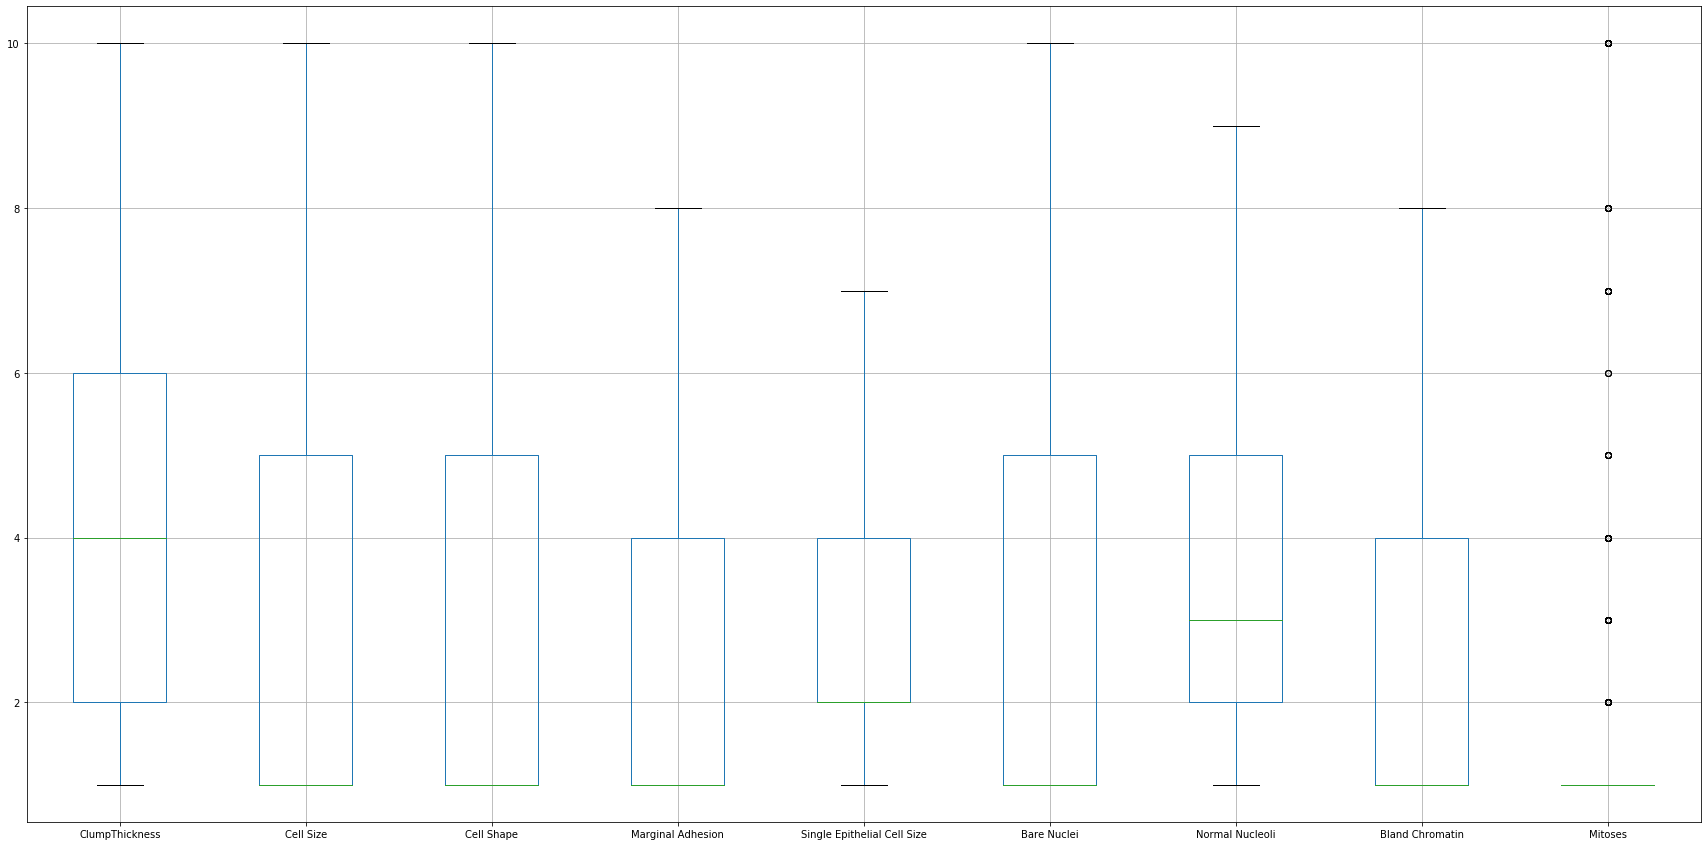

In [409]:
bc_df.boxplot(figsize=(30,15))


# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix


In [410]:
cov_matrix = np.cov(bc_df.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 7.92839546  5.541164    5.47769019  2.64569114  2.11588598  6.01714689
   3.44977885  2.81685052  1.69038864]
 [ 5.541164    9.3114027   8.22421306  4.00414632  3.14806252  7.58922284
   4.78266127  3.87175293  2.4005661 ]
 [ 5.47769019  8.22421306  8.8322655   3.71725674  2.97100237  7.6152875
   4.54622855  3.66448385  2.23715623]
 [ 2.64569114  4.00414632  3.71725674  3.6654861   1.72288082  4.46467118
   2.7398371   2.16068801  1.02695213]
 [ 2.11588598  3.14806252  2.97100237  1.72288082  1.96159475  3.15866301
   1.91406471  1.68270472  0.86824403]
 [ 6.01714689  7.58922284  7.6152875   4.46467118  3.15866301 13.11836803
   5.40802251  4.1162959   2.12693328]
 [ 3.44977885  4.78266127  4.54622855  2.7398371   1.91406471  5.40802251
   4.76116105  2.5972019   1.18707855]
 [ 2.81685052  3.87175293  3.66448385  2.16068801  1.68270472  4.1162959
   2.5972019   3.74982271  1.19440379]
 [ 1.69038864  2.4005661   2.23715623  1.02695213  0.86824403  2.12693328
  

# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [411]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.34430227  0.29554787 -0.88233471 -0.08798269 -0.03480947  0.03176831
   0.0738467  -0.00602078 -0.01189061]
 [ 0.44831048  0.35789544  0.29553107  0.0216616   0.25385657 -0.01493813
   0.03059512 -0.30998354 -0.6491753 ]
 [ 0.43644538  0.29821681  0.22446501  0.07470606  0.41687293 -0.11552565
  -0.09284394  0.12115999  0.67393447]
 [ 0.23370023 -0.0567938   0.18478963 -0.27531112 -0.2765797   0.27493568
   0.78884902 -0.14083922  0.19496366]
 [ 0.17420212  0.05117757  0.10100341 -0.06807922 -0.08056746 -0.07188974
   0.13306025  0.92151298 -0.27138085]
 [ 0.50520959 -0.80587293 -0.10428121  0.22613499  0.14573366 -0.0837946
  -0.0146064  -0.03244113 -0.06160258]
 [ 0.2841942  -0.05623319  0.11645375 -0.40386629 -0.28783539  0.57824216
  -0.56565282  0.02087865  0.04230589]
 [ 0.22822735  0.04722901  0.10787717 -0.17948555 -0.59751292 -0.70524916
  -0.1565845  -0.13582192  0.06681897]
 [ 0.13013883  0.18697709  0.05779164  0.81198384 -0.46525848  0.25671341
  -0.

# Q8 Find variance and cumulative variance by each eigen vector

In [413]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 69.55096732  77.51223841  84.0580469   88.22563112  91.98712288
  94.75814544  97.28620537  98.72976801 100.        ]


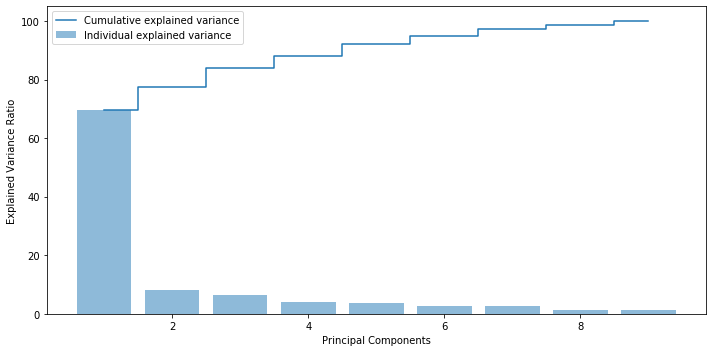

In [414]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [418]:
from sklearn.decomposition import PCA
pca = PCA()
# fit on data
pca.fit(bc_df)
# access values and vectors
print("PCA components")
print(pca.components_)

print("\nExplained Variance")
print(pca.explained_variance_)
# transform data
df_pca = pca.transform(bc_df)

PCA components
[[ 0.34430227  0.44831048  0.43644538  0.23370023  0.17420212  0.50520959
   0.2841942   0.22822735  0.13013883]
 [ 0.29554787  0.35789544  0.29821681 -0.0567938   0.05117757 -0.80587293
  -0.05623319  0.04722901  0.18697709]
 [ 0.88233471 -0.29553107 -0.22446501 -0.18478963 -0.10100341  0.10428121
  -0.11645375 -0.10787717 -0.05779164]
 [-0.08798269  0.0216616   0.07470606 -0.27531112 -0.06807922  0.22613499
  -0.40386629 -0.17948555  0.81198384]
 [ 0.03480947 -0.25385657 -0.41687293  0.2765797   0.08056746 -0.14573366
   0.28783539  0.59751292  0.46525848]
 [-0.03176831  0.01493813  0.11552565 -0.27493568  0.07188974  0.0837946
  -0.57824216  0.70524916 -0.25671341]
 [ 0.0738467   0.03059512 -0.09284394  0.78884902  0.13306025 -0.0146064
  -0.56565282 -0.1565845  -0.01753939]
 [ 0.01189061  0.6491753  -0.67393447 -0.19496366  0.27138085  0.06160258
  -0.04230589 -0.06681897 -0.05034429]
 [-0.00602078 -0.30998354  0.12115999 -0.14083922  0.92151298 -0.03244113
   0.0208

# Q10 Find correlation between components and features

In [419]:
df_comp=pd.DataFrame(pca.components_,columns=list(bc_df))
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.344302,0.448310,0.436445,0.233700,0.174202,0.505210,0.284194,0.228227,0.130139
1,0.295548,0.357895,0.298217,-0.056794,0.051178,-0.805873,-0.056233,0.047229,0.186977
2,0.882335,-0.295531,-0.224465,-0.184790,-0.101003,0.104281,-0.116454,-0.107877,-0.057792
3,-0.087983,0.021662,0.074706,-0.275311,-0.068079,0.226135,-0.403866,-0.179486,0.811984
4,0.034809,-0.253857,-0.416873,0.276580,0.080567,-0.145734,0.287835,0.597513,0.465258


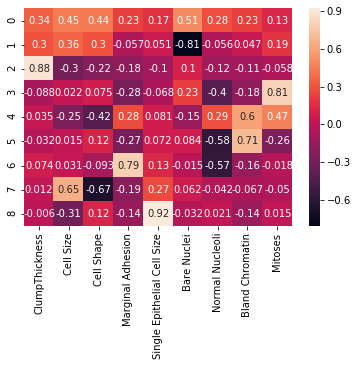

In [420]:
sns.heatmap(df_comp, annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [421]:
jokes = pd.read_csv("jokes.csv")
jokes.head()


,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [422]:
jokes1 = jokes.iloc[0:200,1:] 
jokes1.head()

##data.iloc[:,-1]

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [423]:
jokes2 = jokes1.replace(99.00,0)
jokes2.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [424]:
ratings_diff=jokes2.mean()
df_rating_mean = pd.DataFrame({'mean_rating': ratings_diff})
df_rating_mean.sort_values(by='mean_rating', ascending=False)


,mean_rating
Joke50,4.05540
Joke36,3.61150
Joke53,3.57150
Joke35,3.22315
Joke29,3.18995
Joke27,3.05240
Joke62,2.86185
Joke49,2.85000
Joke32,2.77955
Joke31,2.65710
